In [2]:
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('steam_games_limpio.csv', encoding='utf-8')

In [4]:
# Convertir la columna "release_date" al tipo datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [5]:
# Eliminamos una columna
df.drop('Unnamed: 0', axis=1,inplace=True)

In [6]:
def genero(Año: str):
    # Filtrar solo los registros correspondientes al año ingresado
    df_filtered = df[df['release_date'].dt.year == int(Año)]

    # Eliminar los valores nulos en la columna "genres"
    df_filtered = df_filtered.dropna(subset=['genres'])

    # Convertir las cadenas de géneros en listas reales
    df_filtered['genres'] = df_filtered['genres'].apply(ast.literal_eval)

    # Unir todas las listas de géneros en una única lista
    all_genres = [genre for sublist in df_filtered['genres'] for genre in sublist]

    # Contar la frecuencia de cada género
    genre_counts = pd.Series(all_genres).value_counts()

    # Obtener los 5 géneros más vendidos en orden correspondiente
    top_5_genres = genre_counts.head(5).index.tolist()

    # Convertir la lista de géneros en una cadena con saltos de línea
    top_5_genres_str = '\n'.join(top_5_genres)

    return top_5_genres_str

# Ejemplo de uso de la función
print(genero(2019))

Action
Adventure
Indie
RPG
Strategy


In [7]:
def juegos(Año:str):
    # Filtrar solo los registros correspondientes al año ingresado
    df_filtered = df[df['release_date'].dt.year == int(Año)]

    # Eliminar los valores nulos en la columna "app_name"
    df_filtered = df_filtered.dropna(subset=['app_name'])

    return df_filtered['app_name']

juegos(2018)

0                 Lost Summoner Kitty
1                           Ironbound
5               Battle Royale Trainer
6        SNOW - All Access Basic Pass
7          SNOW - All Access Pro Pass
                     ...             
32049                           BAE 2
32050                    Kebab it Up!
32051                  Colony On Mars
32052        LOGistICAL: South Africa
32053                   Russian Roads
Name: app_name, Length: 96, dtype: object

In [8]:
def specs(Año:str):
    # Filtrar solo los registros correspondientes al año ingresado
    df_filtered = df[df['release_date'].dt.year == int(Año)]

    # Eliminar los valores nulos en la columna "specs"
    df_filtered = df_filtered.dropna(subset=['specs'])

    # Convertir las cadenas de specs en listas reales
    df_filtered['specs'] = df_filtered['specs'].apply(ast.literal_eval)

    # Unir todas las listas de specs en una única lista
    all_specs = [specs for sublist in df_filtered['specs'] for specs in sublist]

    # Contar la frecuencia de cada género
    specs_counts = pd.Series(all_specs).value_counts()

    # Obtener los 5 géneros más vendidos en orden correspondiente
    top_5_specs = specs_counts.head(5).index.tolist()

    # Convertir la lista de géneros en una cadena con saltos de línea
    top_5_specs_str = '\n'.join(top_5_specs)
    
    return top_5_specs_str

print(specs(2018))

Single-player
Steam Achievements
Steam Cloud
Full controller support
Steam Trading Cards


In [9]:
def earlyacces(Año:str):
    # Filtrar solo los registros correspondientes al año ingresado
    df_filtered = df[df['release_date'].dt.year == int(Año)]
    
    # Eliminar los valores nulos en la columna "early_access"
    df_filtered = df_filtered.dropna(subset=['early_access'])
    
    # Contar la cantidad de juegos con early access
    cantidad_early_access = df_filtered['early_access'].sum()
    
    return cantidad_early_access
earlyacces(2017)

720

In [10]:
def sentiment(Año: str):
    # Filtrar solo los registros correspondientes al año ingresado
    df_filtered = df[df['release_date'].dt.year == int(Año)]
    
    # Eliminar los valores nulos en la columna "sentiment"
    df_filtered = df_filtered.dropna(subset=['sentiment'])
    
    # Eliminar las filas que contienen la categoría de sentimiento que tiene "user reviews"
    df_filtered = df_filtered[~df_filtered['sentiment'].str.contains('user reviews')]
    
    # Contar la cantidad de registros para cada categoría de sentimiento
    sentiment_counts = df_filtered['sentiment'].value_counts()
    
    # Convertir la serie de conteos en un diccionario
    sentiment_dict = sentiment_counts.to_dict()
    
    return sentiment_dict

print(sentiment(2018))

{'Mixed': 6, 'Mostly Positive': 3, 'Very Positive': 3, 'Mostly Negative': 1}


In [11]:
def metascore(Año: str):
    # Filtrar solo los registros correspondientes al año ingresado
    df_filtered = df[df['release_date'].dt.year == int(Año)]
    
    # Eliminar los valores nulos en la columna "metascore"
    df_filtered = df_filtered.dropna(subset=['metascore'])
    
    # Ordenar el DataFrame por la columna "metascore" de forma descendente para obtener los mejores puntajes primero
    df_sorted = df_filtered.sort_values(by='metascore', ascending=False)
    
    # Tomar los primeros 5 juegos con mayor metascore
    top_5_games = df_sorted.head(5)
    
    # Obtener la lista de nombres de los juegos y sus puntajes de metascore como una lista de tuplas
    juegos_y_metascore = [(nombre, puntaje) for nombre, puntaje in zip(top_5_games['title'], top_5_games['metascore'])]
    
    return juegos_y_metascore

metascore(2017)

[('OKAMI HD / 大神 絶景版', 93.0),
 ('Divinity: Original Sin 2', 93.0),
 ('Linelight', 90.0),
 ('Bayonetta', 90.0),
 ('F1™ 2017', 89.0)]

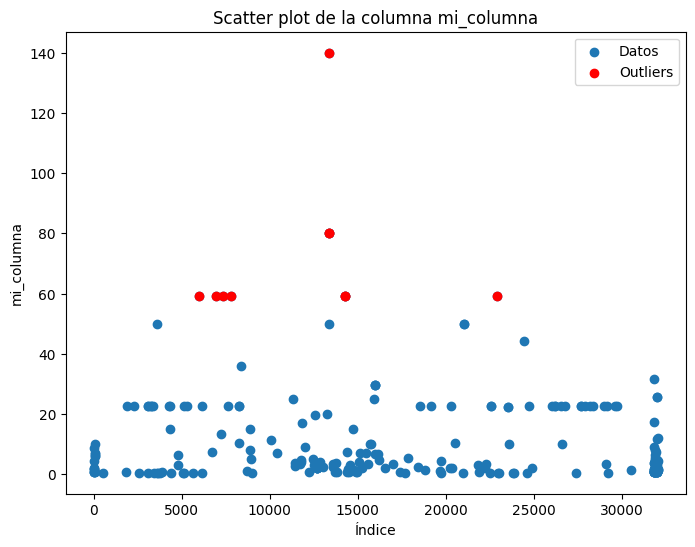

In [12]:
columna = 'discount_price'

# Calcula el IQR
Q1 = df[columna].quantile(0.25)
Q3 = df[columna].quantile(0.75)
IQR = Q3 - Q1

# Calcula los límites inferior y superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identifica los outliers
outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]

# Visualiza los outliers utilizando un scatter plot con Matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df[columna], label='Datos')
plt.scatter(outliers.index, outliers[columna], color='red', label='Outliers')
plt.title('Scatter plot de la columna mi_columna')
plt.xlabel('Índice')
plt.ylabel('mi_columna')
plt.legend()
plt.show()

In [13]:
# Eliminar caracteres no numéricos ni punto decimal de la columna 'price'
df['price'] = df['price'].str.replace('[^\d.]', '', regex=True)

# Convertir los valores a tipo float
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Rellenar los valores NaN (no numéricos) con 0
df['price'].fillna(0, inplace=True)

df.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.49,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",0.00,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",0.00,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",0.83,http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaT,"['Action', 'Indie', 'Casual', 'Sports']",1.79,http://steamcommunity.com/app/773570/reviews/?...,"['Single-player', 'Full controller support', '...",2.99,False,773570,NaN,NaN,NaN


In [14]:
df

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.49,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",0.00,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",0.00,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",0.83,http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaT,"['Action', 'Indie', 'Casual', 'Sports']",1.79,http://steamcommunity.com/app/773570/reviews/?...,"['Single-player', 'Full controller support', '...",2.99,False,773570,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32051,Ghost_RUS Games,"['Casual', 'Indie', 'Simulation', 'Strategy']",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"['Strategy', 'Indie', 'Casual', 'Simulation']",1.49,http://steamcommunity.com/app/773640/reviews/?...,"['Single-player', 'Steam Achievements']",1.99,False,773640,"Nikita ""Ghost_RUS""",NaN,NaN
32052,Sacada,"['Casual', 'Indie', 'Strategy']",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"['Strategy', 'Indie', 'Casual']",4.24,http://steamcommunity.com/app/733530/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",4.99,False,733530,Sacada,NaN,NaN
32053,Laush Studio,"['Indie', 'Racing', 'Simulation']",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"['Indie', 'Simulation', 'Racing']",1.39,http://steamcommunity.com/app/610660/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",1.99,False,610660,Laush Dmitriy Sergeevich,NaN,NaN
32054,SIXNAILS,"['Casual', 'Indie']",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"['Indie', 'Casual', 'Puzzle', 'Singleplayer', ...",NaN,http://steamcommunity.com/app/658870/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",4.99,False,658870,"xropi,stev3ns",1 user reviews,NaN
